<a href="https://colab.research.google.com/github/sosarodrigox/coderhouse_emprendedores_it/blob/main/Emprendedores_IT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✅ Proyecto Final

### Análisis de Datos de Emprendedores en la Provincia de Entre Ríos (2016-2019).

### CoderHouse: Data Science II Machine Learning para ciencia de datos.

###  Rodrigo Sosa - Cohorte 2024
**LinkedIn: https://www.linkedin.com/in/sosarodrigo/**


### 📚 Introducción:
El dataset que utilizaré proviene de un archivo de Google Sheets asociado a un Google Form 📊 (Ver archivo). Este formulario fue diseñado para recopilar datos de emprendedores que participaron en la **Línea de Acción "Incorporación de Tecnología"**💡, un programa gestionado por el Ministerio de Desarrollo Social de Entre Ríos entre marzo de 2016 y agosto de 2019.

### 🚀 Objetivo:
El objetivo de este proyecto es analizar los datos recopilados en el formulario para identificar patrones y tendencias en la información proporcionada por los emprendedores registrados durante este periodo. A través de este análisis, espero obtener información valiosa que pueda ser utilizada para mejorar la eficacia de los programas de apoyo a los emprendedores en la provincia de Entre Ríos, específicamente mediante la provisión de maquinaria y herramientas bajo el esquema de ANR (Aportes No Reembolsables).

Como Técnico en Gestión y Administración Pública, me interesa profundizar en el análisis de datos para mejorar la toma de decisiones en el ámbito público. Este proyecto representa una oportunidad para aplicar los conocimientos adquiridos en el curso de Data Science II de CoderHouse y contribuir al desarrollo de políticas públicas que fomenten el emprendimiento en la provincia de Entre Ríos. 📈

Por otro lado, considero que uno de los grandes desafíos en la aplicación de políticas públicas radica en la selección subjetiva de beneficiarios, la evaluación de los resultados, la medición del impacto de las políticas implementadas, y la falta de información confiable y actualizada sobre la situación de los emprendedores en la provincia. Por ello, el análisis de datos es una herramienta fundamental para mejorar la eficacia de las políticas públicas y garantizar que los recursos se utilicen de manera eficiente y equitativa.

Por lo tanto, centraré mi análisis en los siguientes puntos:

* Identificar los principales sectores de actividad de los emprendedores en la provincia de Entre Ríos.
* Analizar la distribución geográfica de los emprendedores en la provincia.
* Evaluar la calidad de los datos registrados.
* Identificar los factores que influyen en la aprobación o desaprobación de los emprendedores.
* Determinar cuáles son las variables que más influyen en la aprobación de los emprendedores.
* Identificar las principales métricas para considerar como KPIs en el diseño de futuras políticas públicas.

### 1️⃣ Anonimizar el Dataset:

Dado que la privacidad es una prioridad 🔒, he eliminado todas las columnas que contenían información personal identificable. Consideré que estos datos no son necesarios para los objetivos de mi proyecto y que su inclusión no aportaría valor a los análisis que realizaré. Utilicé las herramientas propias de Google Sheets para eliminar las columnas y obtener el dataset de trabajo.

Las columnas eliminadas son:

* Nombre y apellido del emprendedor
* Teléfono celular y fijo del emprendedor
* Correo electrónico del emprendedor
* Dirección del emprendedor y del emprendimiento (generalmente es la misma)
* Tipo (todos los registros corresponden a DNI) y número de DNI
* Nombre y apellido del referente territorial
* Apellido del integrante del equipo técnico que realizó la entrevista.
* Teléfono del referente territorial

### 2️⃣ Carga de Datos desde GitHub

Creé el repositorio público en GitHub: https://github.com/sosarodrigox/coderhouse_emprendedores_it

Luego obtengo el enlace **RAW** del dataset para importarlo a mi notebook. Para lo mismo utilizo la librería **Pandas**.


In [ ]:
# Importar librerías:
import pandas as pd
import missingno as msno

In [ ]:
# Ruta del archivo Excel en GitHub
url = "https://github.com/sosarodrigox/coderhouse_emprendedores_it/raw/main/emprendedores%20_it.xlsx"

df = pd.read_excel(url)

# Configuración para mostrar todas las columnas
pd.set_option("display.max_columns", None)  # Muestra todas las columnas sin cortes
pd.set_option(
    "display.expand_frame_repr", False
)  # Evita el salto de línea entre las columnas

# Mostrar las primeras filas
df.head(2)

,Marca temporal,Marcar entrevista como:,Fecha de la entrevista:,Fecha de la entrevista-Final:,Equipo Técnico:,Referencia a Expediente:,Localidad:,Departamento:,Fecha de Nacimiento-Final:,Sexo:,Estado Civil:,Nivel de Estudio Actual:,Situación Laboral PRINCIPAL:,Situación Habitacional:,Tipo de vivienda:,Situación Familiar:,Situación ante el IVA:,Observaciones Respecto al IVA:,Tramitó la Exención Impositiva en ATER?:,Ingreso MENSUAL de su Economía Familiar:,Nombre del emprendimiento:,Facebook del emprendimiento:,E-mail (Del Emprendimiento):,Descripción del Emprendimiento:,Antigüedad del Emprendimiento (Años):,Antigüedad del Emprendimiento (Meses):,Tiempo que dedica al emprendimiento (Días a la semana):,Tiempo que dedica al emprendimiento (Horas por día):,Realizó algún tipo de capacitación previa para su emprendimiento:,"En caso de haber recibido algún tipo de capacitación, marque cuales:",Cantidad de personas involucradas en el emprendimiento:,Qué función cumplen?:,Cómo realiza sus ventas? / Cómo ofrece sus servicios?:,Utiliza tarjeta de crédito para realizar sus ventas?:,Cantidad de clientes:,Facturación Mensual (Ingresos Brutos):,Costo Mensual (Egresos):,Ganancia Mensual-Final:,Detallar el nivel de producción semanal:,Donde compra la materia prima?:,El emprendimiento se desarrolla en un ámbito:,Donde realiza su producción? / Donde ofrece su servicio?:,Condiciones del espacio físico donde desarrolla el emprendimiento:,Observaciones del espacio productivo:,Qué habilitaciones posee su espacio productivo?:,Servicio Eléctrico:,Servicio de Gas:,Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?:,En qué invirtió o para qué utilizó el fortalecimiento adquirido?:,Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:,Equipamiento con el que cuenta:,Herramientas o equipamiento que solicita:,Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as:,Devolución con respecto a la gestión de la herramienta o equipamiento:,Evaluación Final:,Herramienta/as aprobada/as por Equipo Técnico:,Monto Máximo ($) aprobado por Equipo Técnico:,Herramienta comprada Efectivamente:,Observaciones de la entrevista:,Rubro:,Sub-Rubro:,Sub-Rubro:.1,Sub-Rubro-Final:,Actividad:,Actividad:.1,Actividad:.2,Actividad:.3,Actividad:.4,Actividad:.5,Actividad:.6,Actividad:.7,Actividad:.8,Actividad:.9,Actividad:.10,Actividad:.11,Actividad:.12,Actividad:.13,Actividad:.14,Actividad:.15,Actividad-Final:
0,2016-03-18 09:27:31,La entrevista se realizó correctamente.,2016-03-17 00:00:00,2016-03-17 00:00:00,Gisela,NaN,Gualeguaychú,Gualeguaychú,1971-02-09 00:00:00,Femenino,Casada/o,Secundario Completo,Autoempleado,Vivienda Alquilada,TIPO B,Vive con su esposo quien realiza changas de ja...,Monotributo Social,NaN,SI,6000.0,Lo Nuestro,Lo Nuestro,NaN,"Pre pizzas, pasta frolas, cremonas, pan sabori...",12.0,0.0,48.0,0.0,SI,Capacitación en el Oficio,1,"Los dos hacen todo, Brenda hace lo de reposter...","Tiene un puesto fijo en una Feria., Coordina l...",NO,15,4000.0,2500.0,NaN,10 a 30 kg de harina,mayoristas locales,Urbano,En su casa. (No posee un espacio destinado al ...,Regular.,"Muy chico. 3 x 5 m. Techo cieloraso, piso cera...",Ninguna,Instalación Monofásica.,Gas Envasado.,Programa de Microcréditos para el Desarrollo d...,Insumos- Elementos de Cocina,No,"Horno 6 moldes pizzero, Heladera familiar, bat...",Amasadora y sobadora de mesa,Para agregar otros productos con hojaldre y ag...,Aprobado,Se considera necesario otorgar la maquinaria s...,Amasadora y Sobadora,22.0,NaN,La producción es por pedido pero tienen pedido...,Producción,NaN,Panificación,Panificación,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pastelería,NaN,NaN,NaN,Pastelería
1,2016-03-31 11:41:15,La entrevista se realizó correctamente.,2016-03-18 00:00:00,2016-03-18 00:00:00,Rodrigo,NaN,Victoria,Victoria,1971-02-10 00:00:00,Masculino,Casada/o,Secundario Incompleto,Empleado,Vivienda Propia,Tipo A,El emprendedo

### 3️⃣ Data Wrangling:

El Data Wrangling, también conocido como data cleaning o preparación de datos, es el proceso de transformar y mapear los datos brutos en un formato más adecuado para el análisis. Este paso es crucial para asegurarse de que los datos sean consistentes, estén limpios y sean utilizables para análisis posteriores.

Tareas comunes de Data Wrangling:

*   Eliminar columnas irrelevantes o redundantes.
*   Cambiar los nombres de las columnas para que sean más descriptivos o consistentes.
*   Manejo de valores faltantes (rellenar, eliminar o imputar).
*   Corrección de tipos de datos (por ejemplo, convertir fechas de texto a formato de fecha).
*   Eliminar duplicados en los datos.
*   Transformar datos (normalización, estandarización, etc.).
*   Fusionar datasets (merge, join)

**Comenzaremos con la comprensión y exploración Inicial de los Datos en el dataset.**


In [ ]:
# Información de las columnas del dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263 entries, 0 to 1262
Data columns (total 80 columns):
 #   Column                                                                                                          Non-Null Count  Dtype         
---  ------                                                                                                          --------------  -----         
 0   Marca temporal                                                                                                  1263 non-null   datetime64[ns]
 1   Marcar entrevista como:                                                                                         1263 non-null   object        
 2   Fecha de la entrevista:                                                                                         1263 non-null   object        
 3   Fecha de la entrevista-Final:                                                                                   1263 non-null   object        
 4   

In [ ]:
# Descripción estadística de los valores dentro del dataset:
df.describe()

,Marca temporal,Ingreso MENSUAL de su Economía Familiar:,Antigüedad del Emprendimiento (Años):,Antigüedad del Emprendimiento (Meses):,Tiempo que dedica al emprendimiento (Días a la semana):,Tiempo que dedica al emprendimiento (Horas por día):,Facturación Mensual (Ingresos Brutos):,Costo Mensual (Egresos):,Ganancia Mensual-Final:,Monto Máximo ($) aprobado por Equipo Técnico:,Actividad:.2
count,1263,1.250000e+03,1250.000000,1250.000000,1250.000000,1250.000000,1.250000e+03,1.250000e+03,1.251000e+03,340.000000,0.0
mean,2017-10-24 19:43:54.095803648,9.111398e+05,6.869600,1.510400,5.264000,7.425600,9.497257e+03,1.230042e+04,-2.864069e+03,18742.741176,NaN
min,2016-03-18 09:27:31,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,-1.000000e+07,10.000000,NaN
25%,2016-10-18 10:18:36,7.000000e+03,1.000000,0.000000,5.000000,6.000000,4.000000e+03,1.000000e+03,2.500000e+03,15000.000000,NaN
50%,2017-11-14 13:27:02,1.200000e+04,4.000000,0.000000,6.000000,8.000000,6.000000e+03,2.000000e+03,4.000000e+03,17000.000000,NaN
75%,2018-09-17 10:58:50.500000,1.800000e+04,10.000000,0.000000,6.000000,8.000000,1.000000e+04,4.000000e+03,6.500000e+03,20000.000000,NaN
max,2019-08-29 11:59:11,1.111111e+09,50.000000,12.000000,48.000000,24.000000,1.111111e+06,1.111111e+07,3.800000e+04,150000.000000,NaN
std,NaN,3.142791e+07,8.239885,2.909134,1.826958,2.886924,3.217233e+04,3.142174e+05,2.829186e+05,12269.771555,NaN


In [ ]:
# Forma del conjunto de datos:
df.shape

(1263, 80)

<Axes: >

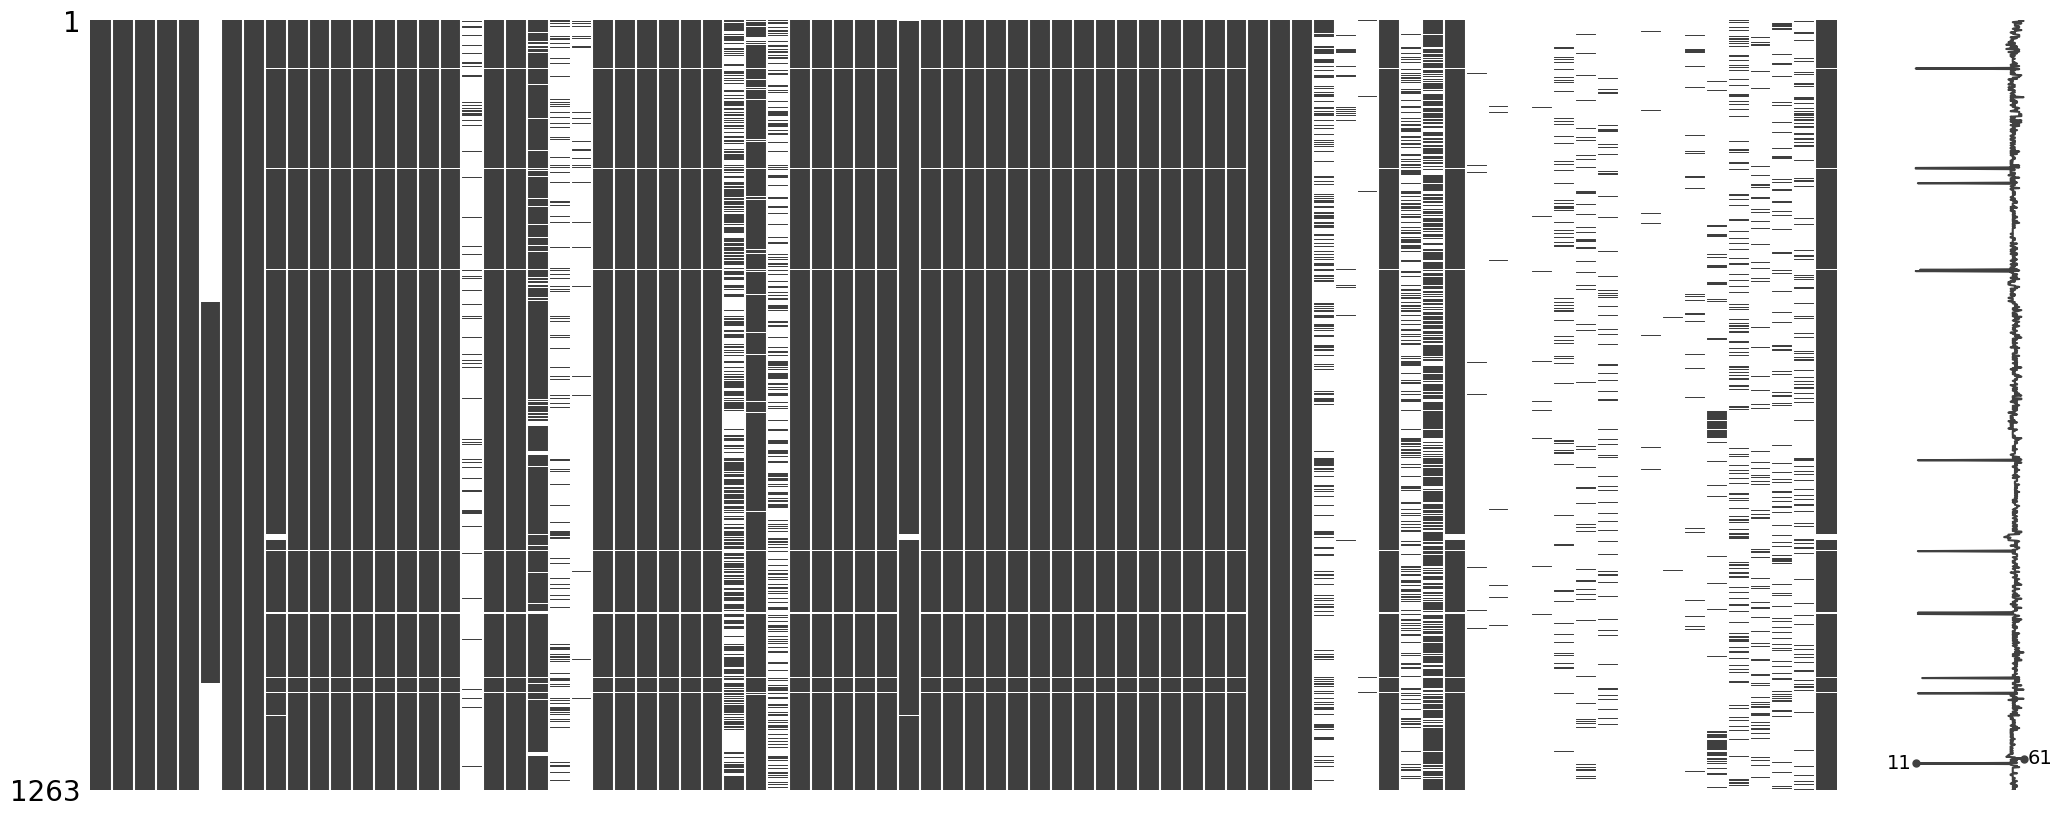

In [ ]:
# Visualizar los valores nulos graficamente:
msno.matrix(df)

<Axes: >

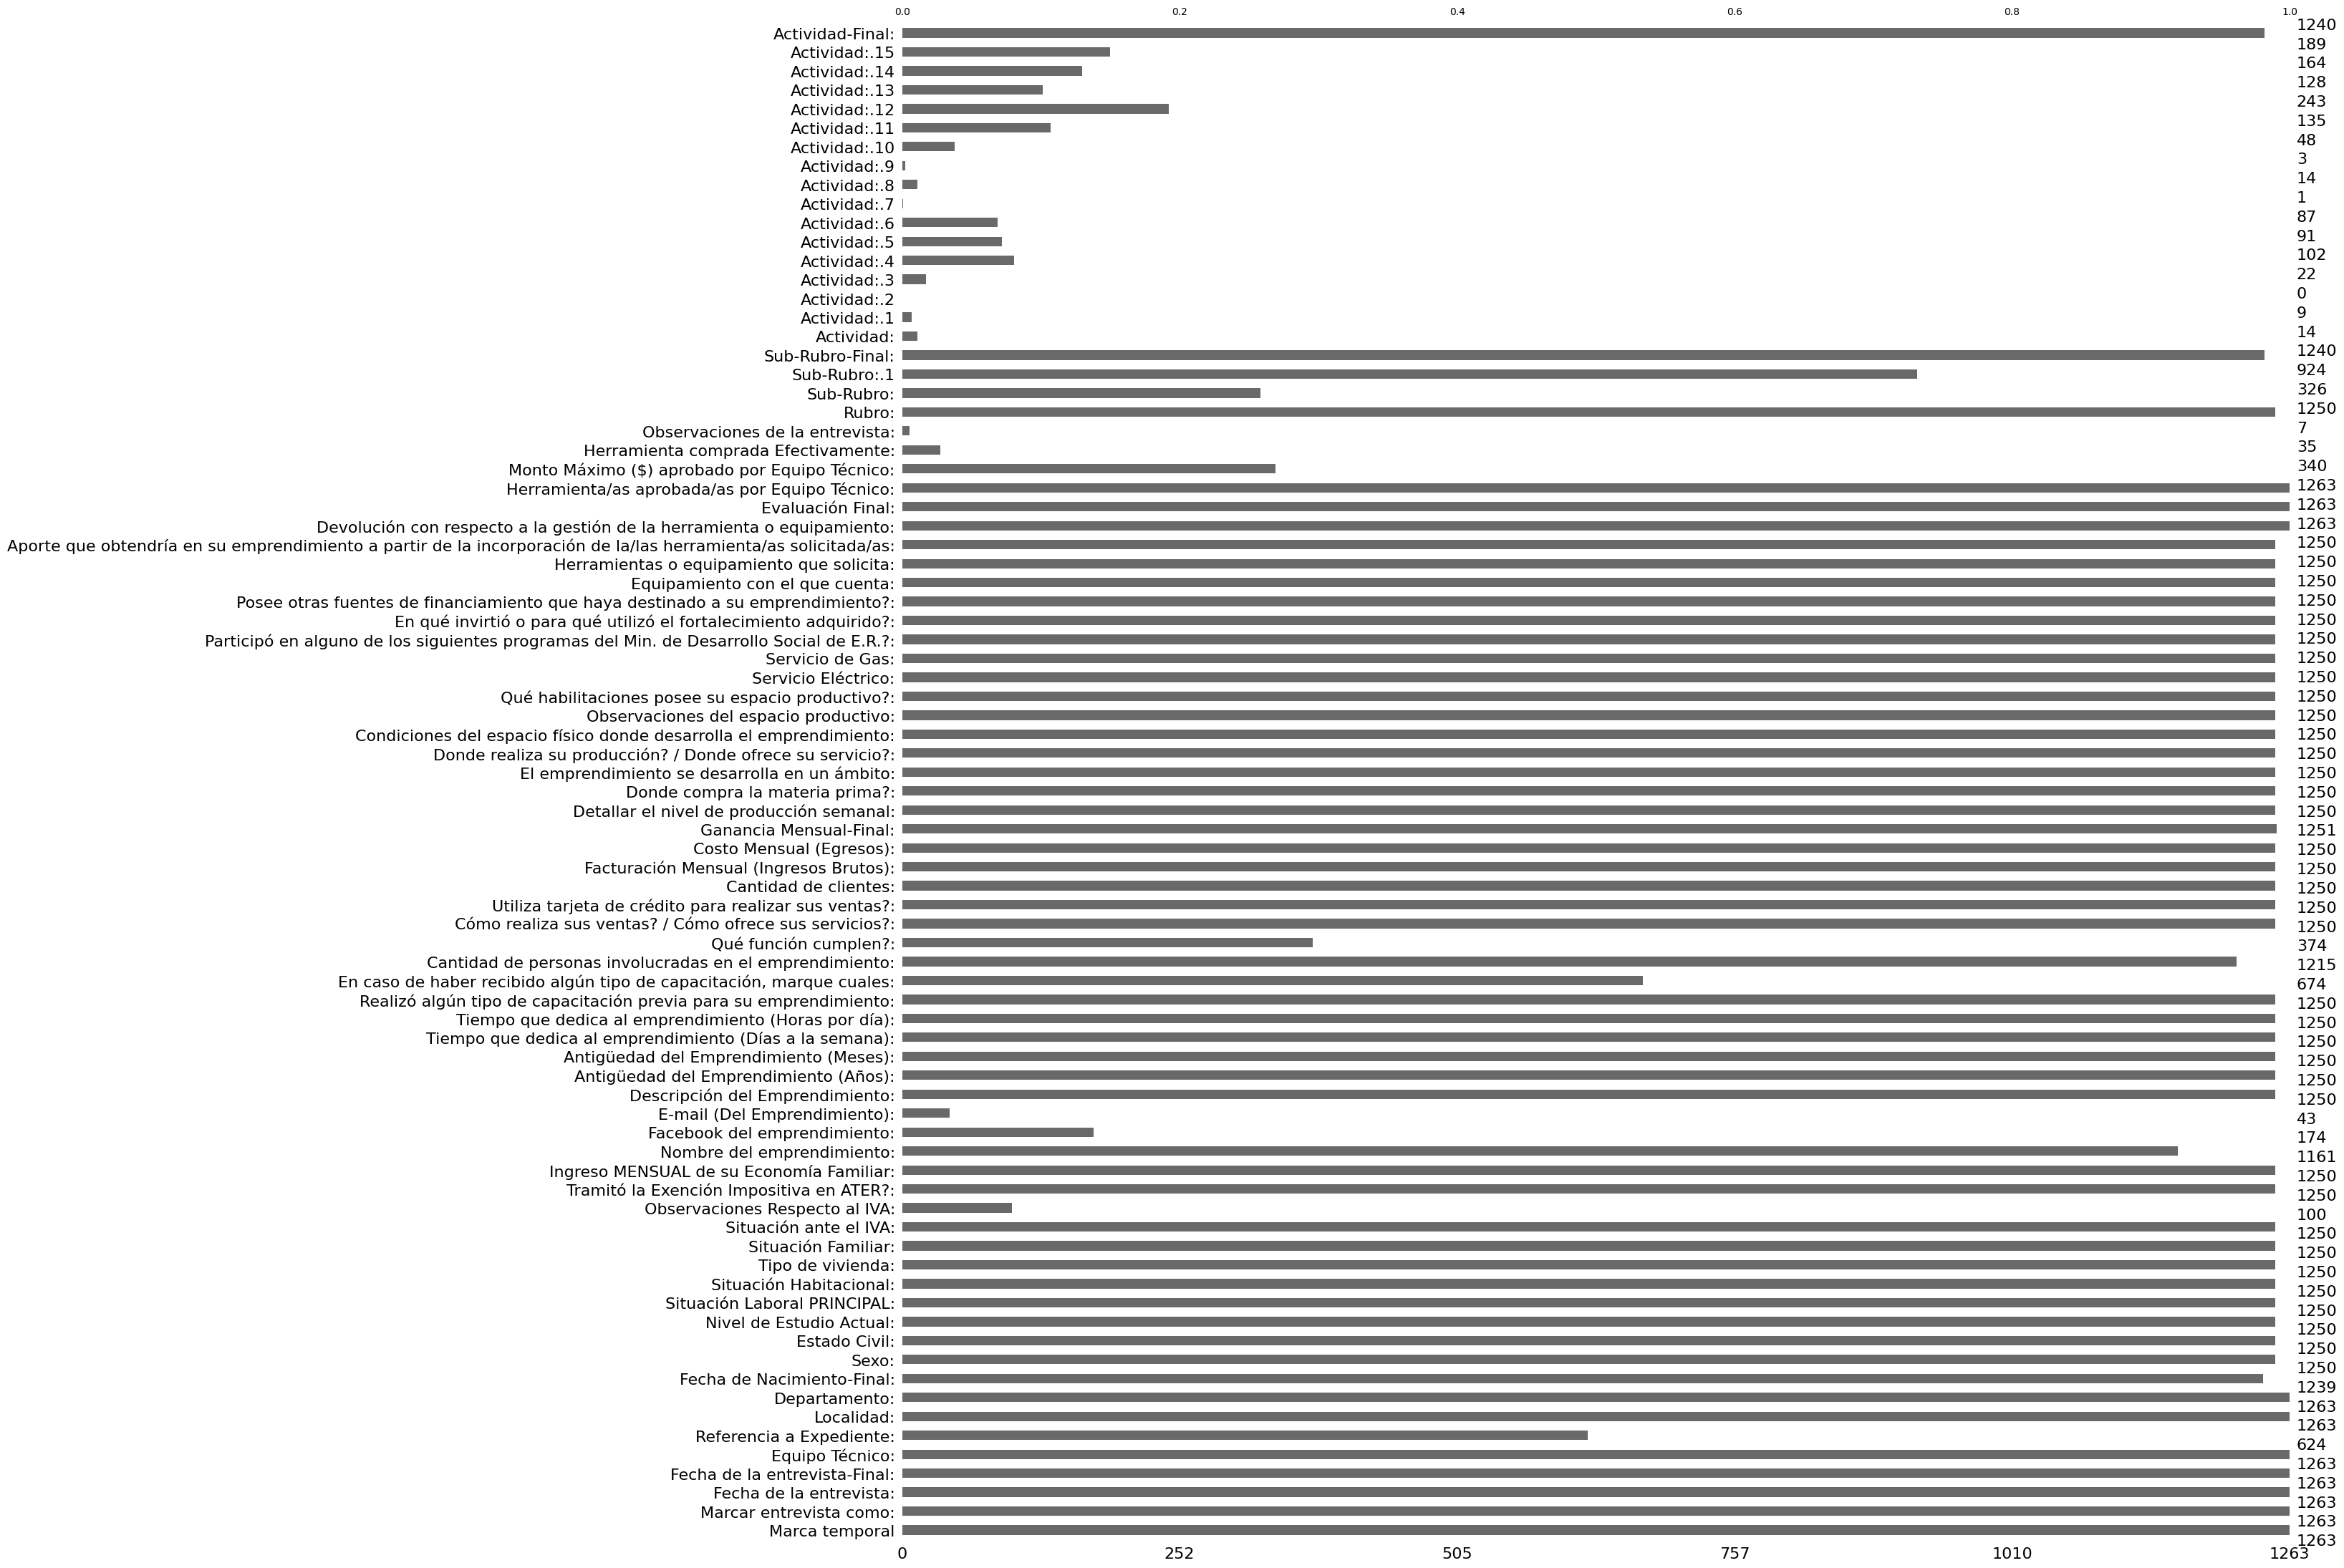

In [ ]:
# Visualiza los valores nulos con una gráfica de barras
msno.bar(df)

In [ ]:
# Calcular la Cantidad de Valores Nulos por Columna.
valores_nulos = df.isnull().sum()

# Clasificar las Columnas Según los Rangos de Valores Nulos.

# a) Columnas Sin Ningún Valor Nulo:
columnas_sin_nulos = valores_nulos[valores_nulos == 0].index.tolist()
print("Columnas sin valores nulos:", columnas_sin_nulos)

# b) Columnas con Mas de 200 Valores Nulos:
columnas_mas_200_nulos = valores_nulos[valores_nulos > 200].index.tolist()
print("Columnas con mas de 200 valores nulos:", columnas_mas_200_nulos)

# c) Columnas con Entre 50 y 200 Valores Nulos:
columnas_50_200_nulos = valores_nulos[valores_nulos.between(50, 200)].index.tolist()
print("Columnas con entre 50 y 200 valores nulos:", columnas_50_200_nulos)

# d) Columnas con Entre 1 y 50 Valores Nulos:
columnas_1_50_nulos = valores_nulos[valores_nulos.between(1, 50)].index.tolist()
print("Columnas con entre 1 y 50 valores nulos:", columnas_1_50_nulos)

# e) Columnas con Todos sus Valores Nulos:
columnas_todos_nulos = valores_nulos[valores_nulos == df.shape[0]].index.tolist()
print("Columnas con todos sus valores nulos:", columnas_todos_nulos)

Columnas sin valores nulos: ['Marca temporal', 'Marcar entrevista como:', 'Fecha de la entrevista:', 'Fecha de la entrevista-Final:', 'Equipo Técnico:', 'Localidad:', 'Departamento:', 'Devolución con respecto a la gestión de la herramienta o equipamiento:', 'Evaluación Final:', 'Herramienta/as aprobada/as por Equipo Técnico:']
Columnas con mas de 200 valores nulos: ['Referencia a Expediente:', 'Observaciones Respecto al IVA:', 'Facebook del emprendimiento:', 'E-mail (Del Emprendimiento):', 'En caso de haber recibido algún tipo de capacitación, marque cuales:', 'Qué función cumplen?:', 'Monto Máximo ($) aprobado por Equipo Técnico:', 'Herramienta comprada Efectivamente:', 'Observaciones de la entrevista:', 'Sub-Rubro:', 'Sub-Rubro:.1', 'Actividad:', 'Actividad:.1', 'Actividad:.2', 'Actividad:.3', 'Actividad:.4', 'Actividad:.5', 'Actividad:.6', 'Actividad:.7', 'Actividad:.8', 'Actividad:.9', 'Actividad:.10', 'Actividad:.11', 'Actividad:.12', 'Actividad:.13', 'Actividad:.14', 'Actividad:.

Luego del análisis exploratorio inicial del dataset observamos lo siguiente:

* El dataset contiene 80 columnas y 1263 registros. Cada registro representa un emprendedor que ha sigo cargado por un técnico administrativo a través del formulario de Google. 💻

#### Interpretación de los valores nulos según su distribución en el dataset:

  - `a) Columnas sin valores nulos:`
    -  ❌ 'Marca temporal': Representa el momento en que se cargó el formulario. No es tan relevante para mis objetivos por el momento.

    - 'Marcar entrevista como': Es importante que no haya valores nulos porque es relevante saber si la entrevista se pudo realizar, o cual fue la razón por la que no se realizó la misma.

    -  ❌ 'Fecha de la entrevista': Momento en que se visitó al emprendedor, un dato muy relevante para a futuro realizar series de tiempo.

    - ✅ 'Fecha de la entrevista-Final': Es el mismo dato que el anterior pero se le ha aplicado una fórmula de excel para que devuelva la fecha en formato DD/MM/AAAA (Puedo eliminar la columna 'Fecha de la entrevista')

    - ✅ 'Equipo Técnico': Representa a la persona que cargó el formulario y generalmente la que realizó la entrevista al emprendedor. No es relevante para mis objetivos actuales, aunque a futuro se podría medir la tendencias o sesgos del personal en la aprobación de los beneficiarios.

    - ✅ 'Localidad' y 'Departamento': Datos para geolocalización de los emprendedores entrevistados.

    - ✅ 'Ganancia Mensual-Final': Representa la diferencia entre los ingresos del emprendimiento y los costos de producir u ofrecer un servicio. Dato importante para evaluar el impacto de la participación en el programa del emprendedor a futuro.

    - ✅ 'Devolución con respecto a la gestión de la herramienta o equipamiento': Dado que es una variable categórica con posible resultado Aprobado/No aprobado, considero que es una variable muy relevante ya que puede ser considerada como variable objetivo de una regresión lineal.

    - 📝 'Evaluación Final': Breve justificación donde cada entrevistador declara el motivo de su evaluación como positiva o negativa. Es importante que este dato no sea nulo, aunque pueda ser dificil de manejar dato su variabilidad. Podría visualizarce como una nube de palabras.

    - 📝🛠️ 'Herramienta/as aprobada/as por Equipo Técnico': Detalle de las herramientas que se le otorgarán al emprendedor en caso de ser aprobado. Dato relevante para evaluar el impacto de la participación en el programa del emprendedor a futuro. Podría realizarce un análisis de frecuencia de las herramientas más solicitadas.

  - `b) Columnas con mas de 200 valores nulos:`
    -  ❌ 'Referencia a Expediente': Dato poco relevante para mi objetivo, además el equipo tecnico observó que raramente vincularon el formulario al expediente una vez obtenido su numero de identificación.

    -  ❌ 'Observaciones Respecto al IVA': Dato poco relevante para mi objetivo, aunque podría ser relevante para evaluar la situación impositiva de los emprendedores.

    -  ❌ 'Facebook del emprendimiento': Dato poco relevante para mi objetivo, aunque podría ser relevante para evaluar la presencia en redes de los emprendedores. El equipo técnico observó que pocos tenian redes sociales.

    -  ❌ 'E-mail (Del Emprendimiento)': Dato poco relevante para mi objetivo, el equipo técnico observó que pocos tenian correo electrónico.

    -  🛠️ 'En caso de haber recibido algún tipo de capacitación marque cuales': Puede ser relevante para evaluar la capacitación previa de los emprendedores y como este valor repercute en su aprobación. Evaluar si la cantidad de datos permite realizar un análisis de frecuencia.

    -  ❌ 'Qué función cumplen?': Poco relevante para mi objetivo, se refiere a las tareas de otros integrantes en un emprendimiento asociativo si fuera el caso.

    -  ❌ 'Monto Máximo ($) aprobado por Equipo Técnico': Es un dato relevante, pero el equipo técnico observó que generalmente no se establecía dado el contexto inflacionario de la economía.

    -  ❌ 'Herramienta comprada Efectivamente': Es un dato relevante para el análisis, pero el equipo observó que los pocos datos que se cargaron, no eran fiables.

    -  ❌ 'Observaciones de la entrevista': La mayoría de sus datos son nulos, su registro no era obligatorio por lo que el equipo técnico en general no registró observaciones de cada entrevista.

    -  ❌ 'Sub-Rubro' y 'Sub-Rubro1': Estas columnas son las utilizadas para obtener el 'Sub-Rubro-Final' por medio de operaciones en la planilla asociada al formulario, se pueden eliminar.

    -  ❌ 'Actividad', 'Actividad.1', 'Actividad.2', 'Actividad.3', 'Actividad.4', 'Actividad.5', 'Actividad.6', 'Actividad.7', 'Actividad.8', 'Actividad.9', 'Actividad.10', 'Actividad.11', 'Actividad.12', 'Actividad.13', 'Actividad.14' y 'Actividad.15': Estas columnas son las utilizadas para obtener la columna 'Actividad-Final' por medio de operaciones en la planilla asociada al formulario, se pueden eliminar.

  - `c) Columnas con entre 50 y 200 valores nulos:`
    - ❌ 'Nombre del emprendimiento': Dato poco relevante para mi objetivo, aunque puede servir para identificar a los emprendedores y realizar análisis de frecuencia de los nombres más comunes.

  - `d) Columnas con entre 1 y 50 valores nulos:`
    - 🧩 'Fecha de Nacimiento-Final': Es un dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🧩 'Sexo': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🧩 'Estado Civil': Dato poco relevante para mi objetivo, aunque puede ser relevante para evaluar la situación familiar de los emprendedores a futuro.

    - 🧩 'Nivel de Estudio Actual': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🧩 'Situación Laboral PRINCIPAL': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🧩 'Situación Habitacional': Dato algo relevante para el objetivo, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🧩 'Tipo de vivienda': Dato algo relevante para el objetivo, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    -  ❌ 'Situación Familiar': Dato poco relevante para mi objetivo, aunque puede ser relevante para evaluar la situación familiar de los emprendedores a futuro.

    - 🧩 'Situación ante el IVA': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    -  ❌ 'Tramitó la Exención Impositiva en ATER?': Dato poco relevante para el análisis, se puede eliminar.

    - 🧩 'Ingreso MENSUAL de su Economía Familiar': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 📝🛠️ 'Descripción del Emprendimiento': Dato relevante pero difícil de manejar por su variabilidad, se puede realizar un análisis de frecuencia de las palabras más utilizadas.

    - 🛠️ 'Antigüedad del Emprendimiento (Años)': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes. Tratar de unificar con 'Antigüedad del Emprendimiento (Meses)'.

    - 🛠️ 'Antigüedad del Emprendimiento (Meses)': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes. Tratar de unificar con 'Antigüedad del Emprendimiento (Años)'.

    - 🛠️ 'Tiempo que dedica al emprendimiento (Días a la semana)': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes. Tratar de unificar con 'Tiempo que dedica al emprendimiento (Horas por día)'.

    - 🛠️ 'Tiempo que dedica al emprendimiento (Horas por día)': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes. Tratar de unificar con 'Tiempo que dedica al emprendimiento (Días a la semana)'.

    - 🧩 'Realizó algún tipo de capacitación previa para su emprendimiento': Dato relevante para el objetivo, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes. Es probable que se pueda realizar un análisis de frecuencia a futuro.

    - 📝 'Cantidad de personas involucradas en el emprendimiento': Dato medianamente relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🛠️ 'Cómo realiza sus ventas? / Cómo ofrece sus servicios?': Dato relevante para el análisis.El mismo cuenta respuestas preseteadas resultado de un input tipo casilla de verificación. Evaluar como manipular los datos.

    - 🧩 'Utiliza tarjeta de crédito para realizar sus ventas?': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 📝 'Cantidad de clientes': Dato relevante pero difícil de manejar por su variabilidad, se puede realizar un análisis de frecuencia de las palabras más utilizadas.

    - ❌ 'Facturación Mensual (Ingresos Brutos)': Dato poco relevante para el anális ya que se tomará la "Ganancia Mensual-Final" la cual es resultado de la facturación - el costo mensual.

    - ❌ 'Costo Mensual (Egresos)': Dato poco relevante para el anális ya que se tomará la "Ganancia Mensual-Final" la cual es resultado de la facturación - el costo mensual.

    - 📝 'Detallar el nivel de producción semanal':  Dato relevante pero difícil de manejar por su variabilidad, se puede realizar un análisis de frecuencia de las palabras más utilizadas.

    - 📝 'Donde compra la materia prima?': Dato poco relevante para los objetivos del análisis.

    - 🧩 'El emprendimiento se desarrolla en un ámbito': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🛠️ 'Donde realiza su producción? / Donde ofrece su servicio?': Dato relevante para el análisis.El mismo cuenta respuestas preseteadas resultado de un input tipo casilla de verificación. Evaluar como manipular los datos.

    - 🧩 'Condiciones del espacio físico donde desarrolla el emprendimiento': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 📝 'Observaciones del espacio productivo': Dato poco relevante para los objetivos del análisis.

    - 🛠️ 'Qué habilitaciones posee su espacio productivo?': Dato relevante para el análisis.El mismo cuenta respuestas preseteadas resultado de un input tipo casilla de verificación. Evaluar como manipular los datos.

    - 🧩 'Servicio Eléctrico':  Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🧩 'Servicio de Gas':  Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🛠️ 'Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?': Dato relevante para el análisis.El mismo cuenta respuestas preseteadas resultado de un input tipo casilla de verificación. Evaluar como manipular los datos.

    - 📝 'En qué invirtió o para qué utilizó el fortalecimiento adquirido?':  Dato poco relevante para los objetivos del análisis.

    - 📝 'Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?':  Dato poco relevante para los objetivos del análisis.

    - 📝🛠️ 'Equipamiento con el que cuenta': Dato poco relevante para los objetivos del análisis.

    - 📝🛠️ 'Herramientas o equipamiento que solicita':  Dato poco relevante para los objetivos del análisis.

    - 📝🛠️ 'Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as':  Dato poco relevante para los objetivos del análisis.

    - 🕵️‍♂️🧩 'Rubro': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🕵️‍♂️🧩 'Sub-Rubro-Final': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

    - 🕵️‍♂️🧩 'Actividad-Final': Dato relevante para el análisis, evaluar la cantidad de nulos y tratar de imputar o consultar al equipo técnico para conseguir los valores faltantes.

  - `Columnas con todos sus valores nulos:`
    - ❌ 'Actividad:.2': Esta columna es utilizada para obtener la columna 'Actividad-Final' por medio de operaciones en la planilla asociada al formulario, se pueden eliminar.

#### ❌ Eliminación de columnas innecesarias del dataset:

Elimino las columnas que identifiqué como irrelevantes para mi objetivo o que el equipo técnico señaló como poco fiables y también aquellas con demasiados valores nulos (más de 200) en el paso anterior. Estas columnas no aportan información relevante para los objetivos de mi proyecto y su eliminación simplificará el análisis de los datos.

In [ ]:
columnas_a_eliminar = [
    "Marca temporal",
    "Fecha de la entrevista:",
    "Referencia a Expediente:",
    "Observaciones Respecto al IVA:",
    "Tramitó la Exención Impositiva en ATER?:",
    "Nombre del emprendimiento:",
    "Facebook del emprendimiento:",
    "E-mail (Del Emprendimiento):",
    "Situación Familiar:",
    "Qué función cumplen?:",
    "Facturación Mensual (Ingresos Brutos):",
    "Costo Mensual (Egresos):",
    "Donde compra la materia prima?:",
    "Monto Máximo ($) aprobado por Equipo Técnico:",
    "Herramienta comprada Efectivamente:",
    "Observaciones de la entrevista:",
    "Sub-Rubro:",
    "Sub-Rubro:.1",
    "Actividad:",
    "Actividad:.1",
    "Actividad:.2",
    "Actividad:.3",
    "Actividad:.4",
    "Actividad:.5",
    "Actividad:.6",
    "Actividad:.7",
    "Actividad:.8",
    "Actividad:.9",
    "Actividad:.10",
    "Actividad:.11",
    "Actividad:.12",
    "Actividad:.13",
    "Actividad:.14",
    "Actividad:.15",
]

# Eliminar las columnas seleccionadas:
df.drop(columnas_a_eliminar, inplace=True, axis=1)

In [ ]:
# Mostrar la nueva forma del conjunto de datos: (1263 Registros, 46 Columnas)
df.shape

(1263, 46)

In [ ]:
# Copio el dataframe "df" y lo asigno como "df_drop":
df_drop = df.copy()
df_drop.head(3)

,Marcar entrevista como:,Fecha de la entrevista-Final:,Equipo Técnico:,Localidad:,Departamento:,Fecha de Nacimiento-Final:,Sexo:,Estado Civil:,Nivel de Estudio Actual:,Situación Laboral PRINCIPAL:,Situación Habitacional:,Tipo de vivienda:,Situación ante el IVA:,Ingreso MENSUAL de su Economía Familiar:,Descripción del Emprendimiento:,Antigüedad del Emprendimiento (Años):,Antigüedad del Emprendimiento (Meses):,Tiempo que dedica al emprendimiento (Días a la semana):,Tiempo que dedica al emprendimiento (Horas por día):,Realizó algún tipo de capacitación previa para su emprendimiento:,"En caso de haber recibido algún tipo de capacitación, marque cuales:",Cantidad de personas involucradas en el emprendimiento:,Cómo realiza sus ventas? / Cómo ofrece sus servicios?:,Utiliza tarjeta de crédito para realizar sus ventas?:,Cantidad de clientes:,Ganancia Mensual-Final:,Detallar el nivel de producción semanal:,El emprendimiento se desarrolla en un ámbito:,Donde realiza su producción? / Donde ofrece su servicio?:,Condiciones del espacio físico donde desarrolla el emprendimiento:,Observaciones del espacio productivo:,Qué habilitaciones posee su espacio productivo?:,Servicio Eléctrico:,Servicio de Gas:,Participó en alguno de los siguientes programas del Min. de Desarrollo Social de E.R.?:,En qué invirtió o para qué utilizó el fortalecimiento adquirido?:,Posee otras fuentes de financiamiento que haya destinado a su emprendimiento?:,Equipamiento con el que cuenta:,Herramientas o equipamiento que solicita:,Aporte que obtendría en su emprendimiento a partir de la incorporación de la/las herramienta/as solicitada/as:,Devolución con respecto a la gestión de la herramienta o equipamiento:,Evaluación Final:,Herramienta/as aprobada/as por Equipo Técnico:,Rubro:,Sub-Rubro-Final:,Actividad-Final:
0,La entrevista se realizó correctamente.,2016-03-17 00:00:00,Gisela,Gualeguaychú,Gualeguaychú,1971-02-09 00:00:00,Femenino,Casada/o,Secundario Completo,Autoempleado,Vivienda Alquilada,TIPO B,Monotributo Social,6000.0,"Pre pizzas, pasta frolas, cremonas, pan sabori...",12.0,0.0,48.0,0.0,SI,Capacitación en el Oficio,1,"Tiene un puesto fijo en una Feria., Coordina l...",NO,15,NaN,10 a 30 kg de harina,Urbano,En su casa. (No posee un espacio destinado al ...,Regular.,"Muy chico. 3 x 5 m. Techo cieloraso, piso cera...",Ninguna,Instalación Monofásica.,Gas Envasado.,Programa de Microcréditos para el Desarrollo d...,Insumos- Elementos de Cocina,No,"Horno 6 moldes pizzero, Heladera familiar, bat...",Amasadora y sobadora de mesa,Para agregar otros productos con hojaldre y ag...,Aprobado,Se considera necesario otorgar la maquinaria s...,Amasadora y Sobadora,Producción,Panificación,Pastelería
1,La entrevista se realizó correctamente.,2016-03-18 00:00:00,Rodrigo,Victoria,Victoria,1971-02-10 00:00:00,Masculino,Casada/o,Secundario Incompleto,Empleado,Vivienda Propia,Tipo A,No se encuentra inscripto,8000.0,Claudio lleva adelante un emprendimiento dedic...,5.0,6.0,6.0,5.0,SI,Capacitación en el Oficio,Emprendimiento individual,La gente lo conoce y va a su domicilio o lo llama,NO,"Posee alrededor de cuarenta clientes fijos, y ...",3500.0,"Alrededor de diez trabajos por semana, dependi...",Urbano,En su casa. (Posee un espacio separado destina...,Bueno.,El emprendedor practica su emprendimiento en e...,Ninguna,Instalación Monofásica.,Gas Envasado.,Programa de Microcréditos para el Desarrollo d...,Utilizó el financiamiento para la compra de he...,No posee otras fuentes de financiamiento.,"Moto-esmeriladora de banco, cargador de baterí...",Soldadora autógena.,El emprendedor utilizará esta herramientas par...,Aprobado,Como equipo técnico consideramos relevante apo...,Soldadora Autógena,Servicios generales,Servicio mecánico,Mecánica del automotor
2,La entrevista se realizó correctamente.,2016-04-21 00:00:00,Gisela,San José,Colón,1978-08-03 00:00:00,Masculino,Divorciada/o,Universitario Incompleto,Autoempleado,Vivienda Alquilada,Tipo A,Monotributo Social,5000.0,"Realiza Joyería en alpaca,

### 🧩 Imputación de valores faltantes:

Para las columnas que considero relevantes y que tienen algunos valores nulos (Entre 1 y 50), evaluaré la posibilidad de imputar los valores faltantes utilizando la media, la mediana o la moda de los datos disponibles. También puedo consultar al equipo técnico para obtener información adicional sobre los emprendedores y completar los datos faltantes (Esto es mas difícil dado que es un programa que se ejecutó en el período 2016-2019).

In [ ]:
# columnas_a_imputar = [

# ]

### 📝 Análisis de descripciones textuales extensas:

Las columnas que contienen este tipo de datos incluyen observaciones y descripciones realizadas por el equipo técnico sobre cada emprendedor. Estos textos, que no están categorizados, contienen información valiosa, aunque difícil de procesar en su estado actual. Se procederá a aplicar técnicas de análisis de texto para extraer palabras clave que sean representativas de las observaciones. Con esta información, se podrán generar categorías útiles para la toma de decisiones futuras y optimizar el diseño de formularios de recolección de datos en programas similares.

### 🛠️ Procesamiento de campos de selección múltiple:

Estas columnas contienen datos provenientes de respuestas de tipo selección múltiple, donde los emprendedores tuvieron la opción de elegir entre varias categorías predefinidas, pero también la posibilidad de seleccionar "Otro" y describir de manera libre su respuesta. Esto genera una combinación de valores categóricos y entradas personalizadas. El objetivo será estandarizar estas respuestas utilizando funciones que permitan procesar las opciones predefinidas y agrupar las respuestas personalizadas en nuevas categorías útiles. Este paso facilitará el análisis y comparación de las respuestas, proporcionando una visión más clara del comportamiento y necesidades de los emprendedores.

### 🕵️‍♂️ Imputación de valores basada en conocimiento experto:

Para ciertas columnas donde los datos faltantes pueden ser completados con el conocimiento especializado del equipo técnico, se procederá a una imputación manual de valores. Esta tarea requerirá la colaboración con los expertos del programa para analizar y tomar decisiones sobre la información faltante. Aunque este proceso es más complejo y demandante de tiempo, es crucial para asegurar la mayor precisión en el análisis de los datos. A futuro, estas imputaciones podrán ayudar a mejorar la calidad de la base de datos y las decisiones basadas en ella.